In [1]:
%matplotlib inline

# APSG tutorial - structural geology module for Python

**APSG** defines several new python classes to easily manage, analyze and visualize orientation structural geology data. There are several classes to work with orientation data, namely `Vector3` for vectorial data and `Lineation`, `Foliation` for axial data

## Basic usage

**APSG** module could be imported either into own name space or into active one for easier interactive work. The `apsg_conf` dictionary allows to modify **APSG** settings.

In [2]:
from apsg import *
apsg_conf['figsize'] = (10, 8)

### Basic operations with vectors
Instance of vector object ``Vector3`` could be created by passing 3 arguments correspondig to 3 components to function `vec3`:

In [3]:
u = vec3(1, -2, 3)
v = vec3(-2, 1, 1)

Alternative ways to create vector is to pass single iterable object as list, tuple or array, or to provide geological orientation according to **APSG** notation (default is *direction of dip* and *dip angle* for planar and *trend* and *plunge* for linear features)

In [4]:
coords = (-2, 2, 3)
a = vec3(coords)
b = vec3(120, 60)
print(a, b)

Vector3(-2, 2, 3) Vector3(-0.25, 0.433, 0.866)


For common vector operation we can use standard mathematical operators or special methods using dot notation

In [5]:
u + v

Vector3(-1, -1, 4)

In [6]:
u - v

Vector3(3, -3, 2)

In [7]:
3*u - 2*v

Vector3(7, -8, 7)

Its magnitude or length is most commonly defined as its Euclidean norm and could be calculated using `abs`

In [8]:
abs(v)

2.449489742783178

In [9]:
abs(u + v)

4.242640687119285

For *dot product* we can use `dot` method or operator `@` 

In [10]:
u.dot(v)

-1

In [11]:
u @ v

-1.0

For *cross product* we can method `cross`

In [12]:
u.cross(v)

Vector3(-5, -7, -3)

To project vector ``u`` onto vector ``v`` we can use method ``proj``

In [13]:
u.proj(v)

Vector3(0.333, -0.167, -0.167)

To find angle (in degrees) between to vectors we use method ``angle``

In [14]:
u.angle(v)

96.26395271992722

Method ``rotate`` provide possibility to rotate vector around another vector. For example, to rotate vector ``u`` around vector ``v`` for 45°

In [15]:
u.rotate(v, 45)

Vector3(2.248, 0.558, 2.939)

## Classes Lineation and Foliation
To work with orientation data in structural geology, **APSG** provide two classes, `Foliation` class to represent planar features and `Lineation` class to represent linear features. Both classes support all `Vector3` methods and operators, but it should be noted, that `dot` and `angle` respect their axial nature, i.e. angle between two lineations cant't be bigger than 90 degrees.

To create instance of `Lineation` or `Foliation`, we can use functions `lin` and `fol`. Arguments have similar syntax to `vec3`.

In [16]:
lin(120, 60), fol(216, 62)

(L:120/60, S:216/62)

We can also cast `Vector3` instance to `Foliation` or `Lineation`

In [17]:
lin(u), fol(u)

(L:297/53, S:117/37)

### Vector methods for Lineation and Foliation


To find angle between two linear or planar features we can use method `angle`

In [18]:
l1 = lin(110, 40)
l2 = lin(160, 30)
l1.angle(l2)

41.59741268003547

In [19]:
p1 = fol(330, 50)
p2 = fol(250, 40)
p1.angle(p2)

54.69639932197533

We can use *cross product* to construct planar feature defined by two linear features

In [20]:
l1.cross(l2)

S:113/40

or to construct linear feature defined by intersection of two planar features

In [21]:
p1.cross(p2)

L:278/36

*Cross product* of planar and linear features could be used to construct plane defined by linear feature and normal of planar feature

In [22]:
l2.cross(p2)

S:96/53

or to find perpendicular linear feature on given plane

In [23]:
p2.cross(l2)

L:276/37

To rotate structural features we can use method ``rotate``

In [24]:
p2.rotate(l2, 45)

S:269/78

## Classes Pair and Fault
To work with paired orientation data like foliations and lineations or fault data in structural geology, **APSG** provide two base `Pair` class and derived `Fault` class. Both classes are instantiated providing dip direction and dip of planar and linear measurements, which are automatically orthogonalized. If misfit is too high, warning is raised. The `Fault` class expects one more argument providing sense of movement information, either 1 or -1 for normal/reverse movement.

To create instance of `Pair`, we have to pass two arguments for planar and two argumets for linear features following geological notation to function `pair`:

In [25]:
p = pair(120, 40, 162, 28)
p

P:118/39-163/30

In [26]:
p.misfit

-3.5623168411508175

Planar and linear features are accessible using `fol` and `lin` properties

In [27]:
p.fol, p.lin

(S:118/39, L:163/30)

To rotate ``Pair`` instance we can use ``rotate`` method

In [28]:
p.rotate(lin(45, 10), 60)

P:314/83-237/61

Instantiation of ``Fault`` class is similar, we just have to provide argument to define sense of movement

In [29]:
f = fault(120, 60, 110, 58, 1)  # 1 for normal fault
f

F:120/59-110/59 +

Note the change in sense of movement after ``Fault`` rotation

In [30]:
f.rotate(lin(45, 10), 60)

F:312/62-340/59 -

To find rotation axis and angle between two `Pair` instances

For simple fault analyses ``Fault`` class also provide ``p``, ``t``, ``m`` and ``d`` properties to get PT-axes, kinematic plane and dihedra separation plane

In [31]:
f.p, f.t, f.m, f.d

(L:315/75, L:116/14, S:27/85, S:290/31)

## Feature sets
*APSG* provide several classes to process, analyze and visualize the sets of data. There are `Vector3Set`, `LineationSet` and `FoliationSet` classes to store `Vector3`, `Lineation` and `Foliation` objects. All these feature sets are created from homogeneous list of data with optional `name` atribute.

In [32]:
v = Vector3Set([vec3(120,60), vec3(116,50), vec3(132,45), vec3(90,60), vec3(84,52)], name='Vectors-1')
v

V(5) Vectors-1

In [33]:
l = LineationSet([lin(120,60), lin(116,50), lin(132,45), lin(90,60), lin(84,52)], name='Lineations-2')
l

L(5) Lineations-2

In [34]:
f = FoliationSet([fol(120,60), fol(116,50), fol(132,45), fol(90,60), fol(84,52)], name='Foliations-3')
f

S(5) Foliations-3

To simplify interactive group creation, you can use function ``G``

In [35]:
g = G('120 60 116 50 132 45 90 60 84 52', name='L1')
g

TypeError: Wrong datatype to create FeatureSet

Method ``len`` returns number of features in group

In [36]:
len(v)

5

Most of the `Lineation`, `Foliation` and `Vector3` methods could be used for feature sets as well. For example, to measure angles between all features in group and another feature, we can use method `angle`:

In [37]:
l.angle(lin(110,50))

array([11.49989817,  3.85569115, 15.61367789, 15.11039885, 16.3947936 ])

To rotate all features in group around another feature, we can use method ``rotate``

In [38]:
lr = l.rotate(lin(150, 30), 45)

To show data in list you can use ``data`` property

In [39]:
l.data

(L:120/60, L:116/50, L:132/45, L:90/60, L:84/52)

In [40]:
lr.data

(L:107/35, L:113/26, L:126/30, L:93/26, L:94/18)

Function `R` returns resultant of all features in set. Note that `Lineation` and `Foliation` are axial in nature, so resultant vector is not reliable. Check the orientation tensor anlysis below.

In [41]:
v.R()

Vector3(-0.941, 2.649, 3.993)

There is several methods to infer spherical statistics as spherical variance, Fisher's statistics, confidence cones on data etc.

In [42]:
l.var()

0.02337168447438498

In [43]:
v.fisher_statistics()

{'k': 34.22945405911087, 'a95': 13.26402990511733, 'csd': 13.844747281750971}

In [44]:
v.delta()

12.411724720740516

In [45]:
v.rdegree()

95.32566310512297

To calculate orientation tensor of all features in group, we can use `ortensor` method.

In [46]:
v.ortensor()

Ortensor3 LLS
(E1:0.954,E2:0.0402,E3:0.00575)
[[ 0.074 -0.096 -0.143]
 [-0.096  0.284  0.421]
 [-0.143  0.421  0.642]]

## Matrix like classes
*APSG* provides matrix-like classes to work with tensor quantities used commonly in structural geology analysis. It includes `DefGrad3` and `VelGrad3` for deformation and velocity gradient, `Stress3` for stress tensor, `Ellipsoid` for quadratic forms and `Ortensor3` for orientation tensor. All these classes support common matrix mathematical operations and provide basic methods and properties.

All matrix-like objects could be created either by passing nested list or tuple or providing individual components to class method `from_comp`

In [47]:
F = DefGrad3([[2, 0, 1], [0, 1, 0], [0, 0, 0.5]])
F

[[2.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]

In [48]:
F = DefGrad3.from_comp(xx=2, zz=0.5, xz=1)
F

[[2.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]

For multiplifications of matrix or vectors we have to use matmul `@` operator

In [49]:
v = vec3('z') # unit-length vector in direction af axis z
u = F @ v
u

Vector3(1, 0, 0.5)

`I` property returns inverse matrix

In [50]:
F.I @ u

Vector3(0, 0, 1)

To transpose matrix, we can use `T` property and for multiplification we have to use `@` operator

In [51]:
F.T @ F

[[4.   0.   2.  ]
 [0.   1.   0.  ]
 [2.   0.   1.25]]

In [52]:
v @ F.T @ F @ v

1.25

Eigenvalues and eigenvectors could be obtained by methods `eigenvalues` and `eigenvectors`. Individual eigenvalues and eigen vectors could be accessed by properties `E1`, `E2`, `E3` and `V1`, `V2`, `V3`

#### Deformation gradient and rotations

Deformation gradient `DefGrad3` could describe distorsion, dilation and rigid-body rotation. All **APSG** features provides `transform` method which transform then using provided deformation gradient.

The rigid-body rotation could be either extracted from deformation gradient using `R` method:

In [53]:
R = F.R
R

[[ 0.928  0.     0.371]
 [ 0.     1.     0.   ]
 [-0.371  0.     0.928]]

or could be created of one of the class methods like `from_axisangle`, defining axis of rotation and angle

In [54]:
R = DefGrad3.from_axisangle(lin(120, 50), 60)
R

[[ 0.552 -0.753  0.359]
 [ 0.574  0.655  0.492]
 [-0.605 -0.065  0.793]]

`from_two_vectors`, where axis of rotation is perpendicular to both vectors and angle is angle of vectors

In [55]:
R = DefGrad3.from_two_vectors(lin(120, 50), lin(270, 80))
R

[[ 0.938  0.074  0.339]
 [ 0.186  0.718 -0.671]
 [-0.294  0.692  0.66 ]]

In [56]:
lin(120, 50).transform(R)

L:270/80

or using `from_two_pairs` method, to describe rotation between two coordinate systems. Note that pair define X axis as lineation vector and Z axis as foliation vector.

In [57]:
p1 = pair(150, 60, 90, 40)
p2 = pair(45, 30, 10, 25)
R = DefGrad3.from_two_pairs(p1, p2)
R

[[-0.071  0.97   0.234]
 [-0.874 -0.174  0.453]
 [ 0.48  -0.173  0.86 ]]

In [58]:
p1.transform(R)

P:45/30-10/25

### Ellipsoids

In deformation analysis, the quadratic forms are represented by `Ellipsoid` class. It could be used to represents either ellipsoid objects or finite strain ellipsoid.

It provides additional methods and properties including `lambda1`, `lambda2` and `lambda3` for square-root of eigenvalues, Woodcock's `shape` and `strength`, `k`, `K`, `d` and `D` for Flinn's and Ramsay symmetries and intensities, `lode` for Lode's parameter etc. For more check documentation. Eigenvectors could be also represented by linear or planar features using properties `eigenlins` and `eigenfols`.

We can create `Ellipsoid` object similarly to `Matrix3` (note that only components of upper triangular part are available in `from_comp` method due to matrix symmetry), or you can use aditional class methods `from_defgrad` and `from_stretch`.

In [59]:
B = Ellipsoid.from_defgrad(F)  # Finger deformation tensor
B

Ellipsoid LS
(E1:5.05,E2:1,E3:0.198)
[[5.   0.   0.5 ]
 [0.   1.   0.  ]
 [0.5  0.   0.25]]

In above example, the Finger deformation tensor `B` represents finite strain ellipsoid reulting from deformation described by deformation gradient `F`. We can explore several parameters:

In [60]:
print(f'Principal stretches: Sx={B.lambda1}, Sy={B.lambda2}, Sz={B.lambda3}')
print(f'Principal strain ratios: Rxy={B.Rxy}, Ryz={B.Ryz}')
print(f"Flinn's finite strain parameters: d={B.d}, k={B.k}")
print(f"Ramsay's finite strain parameters: d={B.D}, k={B.K}")
print(f"Woodcock's parameters: strength={B.strength}, shape={B.shape}")
print(f"Watterson's strain intesity: s{B.r}")
print(f"Nadai's natural octahedral unit shear: {B.goct}")
print(f"Nadai's natural octahedral unit strain: {B.eoct}")
print(f"Lode's parameter: {B.lode}")

Principal stretches: Sx=2.247679020649623, Sy=1.0, Sz=0.4449033829176287
Principal strain ratios: Rxy=2.247679020649623, Ryz=2.247679020649623
Flinn's finite strain parameters: d=1.764484592491078, k=1.0
Ramsay's finite strain parameters: d=1.3118699860194967, k=1.0
Woodcock's parameters: strength=1.6197962748564998, shape=1.0
Watterson's strain intesity: s3.495358041299246
Nadai's natural octahedral unit shear: 1.3225581202197991
Nadai's natural octahedral unit strain: 1.1453689300917396
Lode's parameter: 0.0


In [61]:
C = Ellipsoid.from_defgrad(F, 'right')  # Green's deformation tensor
C

Ellipsoid LS
(E1:5.05,E2:1,E3:0.198)
[[4.   0.   2.  ]
 [0.   1.   0.  ]
 [2.   0.   1.25]]

In [62]:
v @ C @ v

1.25

### Ortensor class
`Ortensor3` class represents orientation tensor of set of vectors, linear or planar features. In adition to `Ellipsoid` methods and properties, it provides properties to describe orientation distribution, e.g. Vollmer's `P`, `G`, `R` and `B` indexes, `Intensity` for Lisle intensity index and `MAD` for approximate angular deviation.

In [63]:
ot = l.ortensor()
# or
ot = Ortensor3.from_features(l)
ot

Ortensor3 LLS
(E1:0.954,E2:0.0402,E3:0.00575)
[[ 0.074 -0.096 -0.143]
 [-0.096  0.284  0.421]
 [-0.143  0.421  0.642]]

In [64]:
ot.eigenvalues()

(0.9540384686596388, 0.04021274946196468, 0.005748781878396424)

In [65]:
ot.eigenvectors()

(Vector3(-0.192, 0.542, 0.818),
 Vector3(-0.981, -0.082, -0.176),
 Vector3(-0.028, -0.836, 0.547))

The instances of `Stress3`, `Ellipsoid` and `Ortensor3` also provides `eigenlins` and `eigenfols` properties to represent principal axes and planes

In [66]:
ot.eigenlins

(L:110/55, L:5/10, L:268/33)

In [67]:
ot.eigenfols

(S:290/35, S:185/80, S:88/57)

In [68]:
ot.strength, ot.shape

(2.5558580045234267, 1.6278666609093755)

In [69]:
ot.k, ot.d

(2.35335135956718, 4.205775614437317)

In [70]:
ot.K, ot.D

(1.6278666609093755, 3.452659043739541)

In [71]:
ot.P, ot.G, ot.R

(0.9138257191976742, 0.06892793516713651, 0.017246345635189272)

In [72]:
ot.MAD

12.379531629057851

## StereoNet class
`StereoNet` allows to visualize fetaures on stereographic projection. Both equal-area Schmidt (default) and equal-angle Wulff projections are supported.

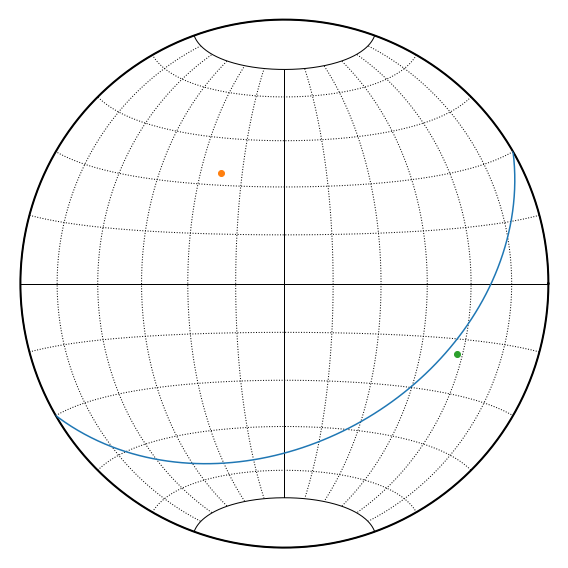

In [73]:
s = StereoNet()
s.great_circle(fol(150, 40))
s.pole(fol(150, 40))
s.line(lin(112, 30))
s.show()

A small circles (or cones) could be plotted as well

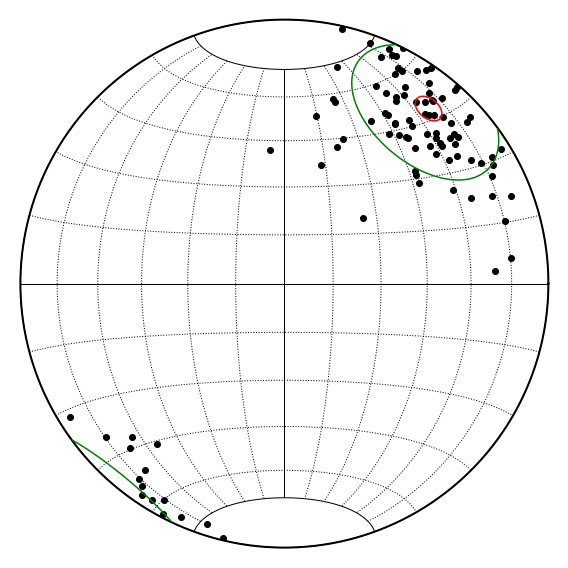

In [82]:
s = StereoNet()
l = LineationSet.random_fisher(position=lin(40, 15), kappa=15)
s.line(l, color='k')
fstat = l.fisher_statistics()
s.cone(l.R(), fstat['a95'], color='r')  # confidence cone on resultant
s.cone(l.R(), fstat['csd'], color='g')  # confidence cone on 63% of data
s.show()

To make density contours plots, a ``contour`` and ``contourf`` methods are available

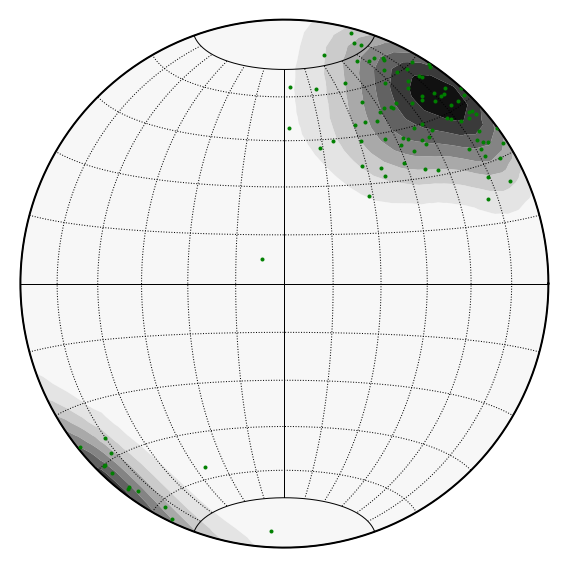

In [84]:
s = StereoNet()
l = LineationSet.random_fisher(position=lin(40, 15), kappa=15)
s.contourf(l, levels=8, coorbar=True)
s.line(l, color='g', marker='.')
s.show()

Except ``Group``, **APSG** provides ``PairSet`` and ``FaultSet`` classes to store ``Pair`` or ``Fault`` datasets. It can be inicialized by passing list of ``Pair`` or ``Fault`` objects as argument or use class methods ``from_array`` or ``from_csv``

In [86]:
p = PairSet([pair(120, 30, 165, 20),
             pair(215, 60, 280,35),
             pair(324, 70, 35, 40)])
p.misfit

array([-2.0650076 , -0.74600727, -0.83154705])

In [87]:
StereoNet(p);

TypeError: __init__() takes 1 positional argument but 2 were given

``StereoNet`` has two special methods to visualize fault data. Method ``fault`` produce classical Angelier plot

In [88]:
f = FaultSet([fault(170, 60, 182, 59, -1),
              fault(210, 55, 195, 53, -1),
              fault(10, 60, 15, 59, -1),
              fault(355, 48, 22, 45, -1)])
s = StereoNet()
s.fault(f)
s.line(f.p, label='P-axes')
s.line(f.t, label='T-axes')
s.plane(f.m, label='M-planes')
s.show()

AttributeError: 'StereoNet' object has no attribute 'fault'

``hoeppner`` method produce Hoeppner diagram and must be invoked from ``StereoNet`` instance

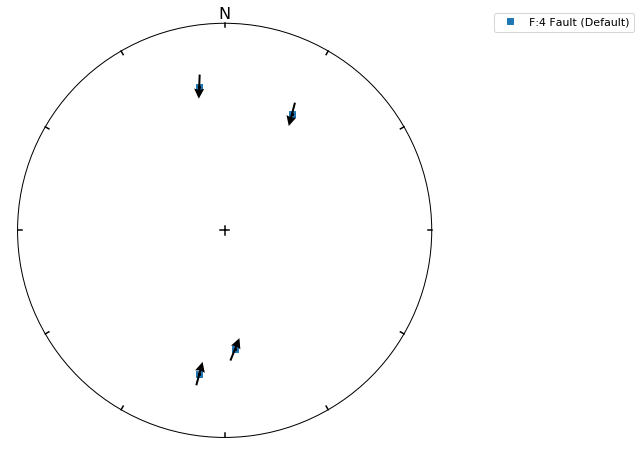

In [63]:
s = StereoNet()
s.hoeppner(f, label=repr(f))
s.show()

Note that ``fault`` method is used, when data are passed directly to ``StereoNet`` instance

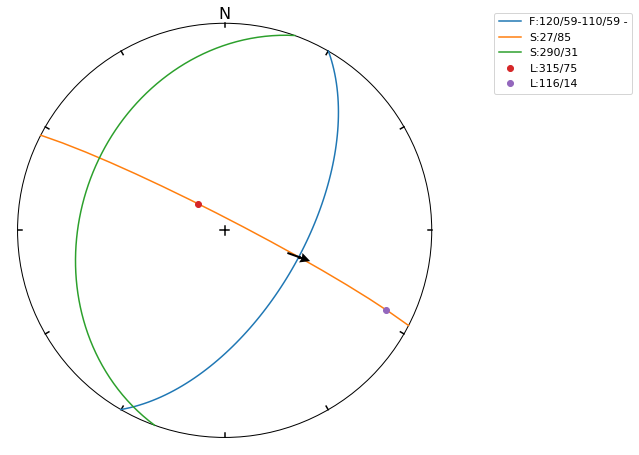

In [64]:
f = Fault(120, 60, 110, 58, -1)
StereoNet(f, f.m, f.d, f.p, f.t);

## StereoGrid class
``StereoGrid`` class allows to visualize any scalar field on StereoNet. Internally it is used for plotting contour diagrams, but it exposes ``apply_func`` method to calculate scalar field by any user-defined function. Function must accept three element ``numpy.array`` as first argument passed from grid points of ``StereoGrid``.

Following example defines function to calculate resolved shear stress on plane from given stress tensor. ``StereoGrid`` is used to calculate this value over all directions and finally values are plotted by ``StereoNet``

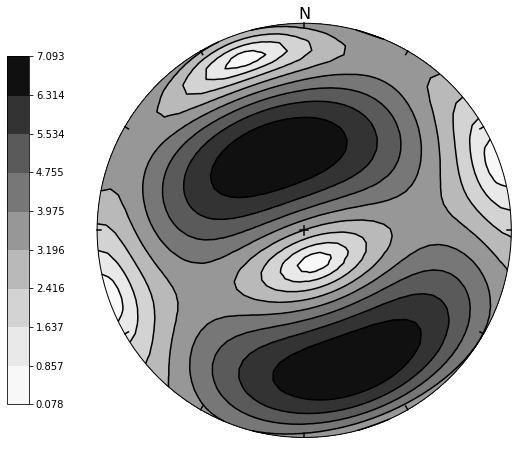

In [65]:
S = Stress([[-10, 2, -3],[2, -5, 1], [-3, 1, 2]])
d = StereoGrid()
d.apply_func(S.shear_stress)
s = StereoNet()
s.contourf(d, 10, legend=True)
s.show()

The ``FaultSet`` provide also ``amgmech`` method which provide access to Angelier dihedra method. Results are stored in ``StereoGrid``. Default behavior is to calculate counts (positive in extension, negative in compression)

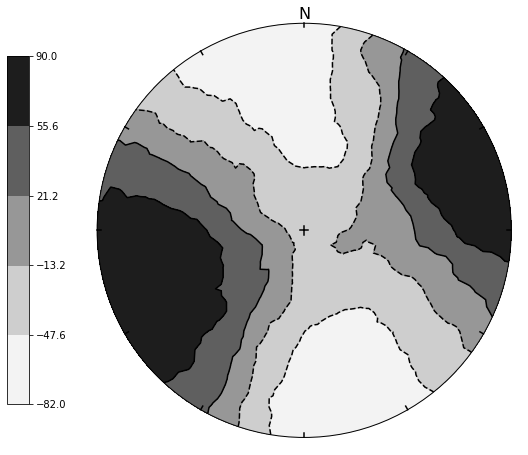

In [66]:
f = FaultSet.examples('MELE')
StereoNet(f.angmech());

Setting method to 'probability', maximum likelihood estimate is calculated.

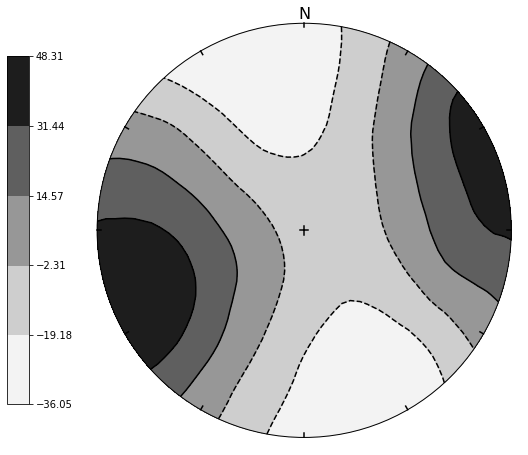

In [67]:
f = FaultSet.examples('MELE')
StereoNet(f.angmech(method='probability'));

## Fabric plots
Tensor-type objects (``Ortensor``, ``Ellipsoid``) could be visualized in several specialized plots. ``FlinnPlot`` class provide classical Flinn's deformation diagram, ``RamsayPlot`` class provide Ramsay modification of Flinn's deformation diagram, ``VollmerPlot`` class provide triangular fabric plot (Vollmer, 1989) and ``HsuPlot`` class provide Hsu fabric diagram using natural strains.

In [68]:
g1 = Group.examples('B2')
g2 = Group.examples('B4')
g3 = Group.uniform_lin(name='Uniform')

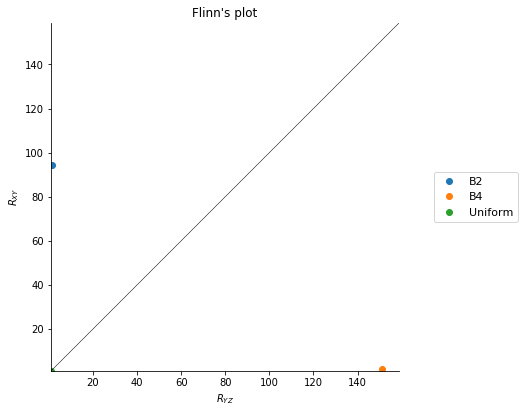

In [69]:
FlinnPlot(g1, g2, g3);

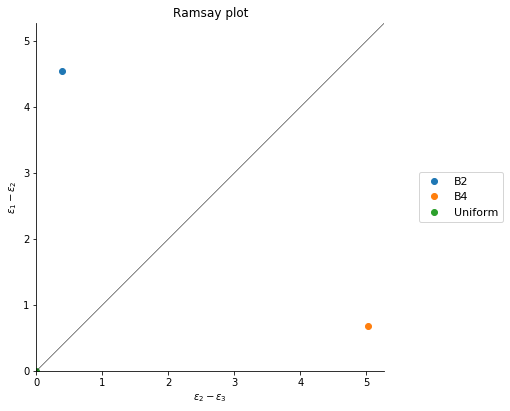

In [70]:
RamsayPlot(g1, g2, g3);

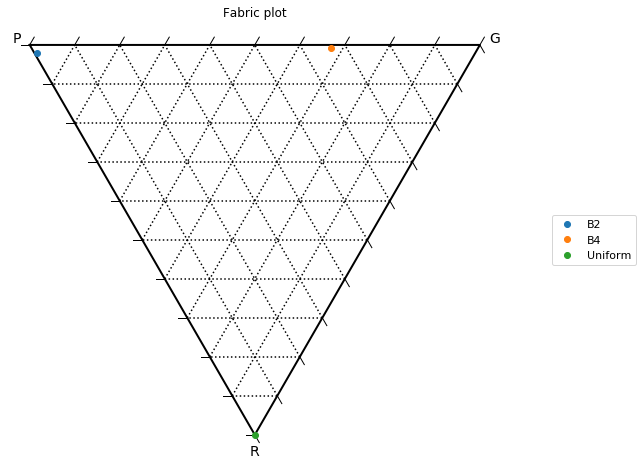

In [71]:
VollmerPlot(g1, g2, g3);

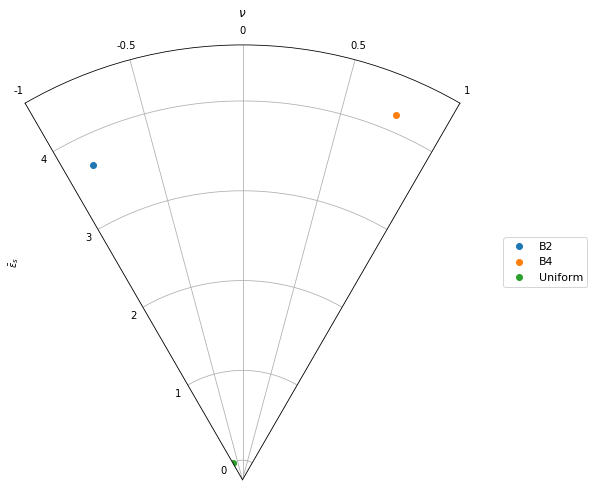

In [72]:
HsuPlot(g1, g2, g3);

All fabric plots has ``path`` method which accepts list of ``Tensor`` objects plotted as line.

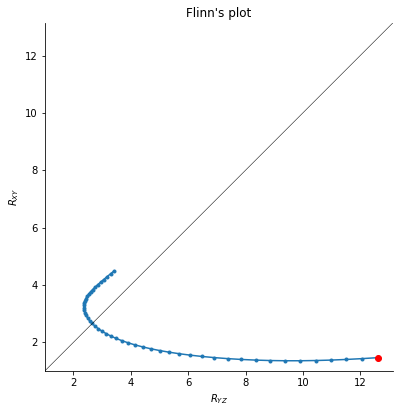

In [73]:
L = VelGrad.from_comp(xx=-2, zz=2)
Eevol = [E.transform(L.defgrad(t/50)) for t in range(50)]
r = FlinnPlot()
r.path(Eevol)
r.plot(E, 'ro')
r.show()

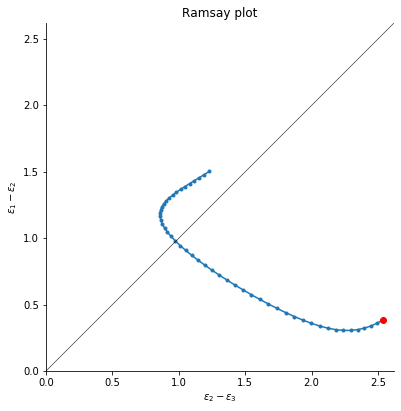

In [74]:
L = VelGrad.from_comp(xx=-2, zz=2)
Eevol = [E.transform(L.defgrad(t/50)) for t in range(50)]
r = RamsayPlot()
r.path(Eevol)
r.plot(E, 'ro')
r.show()

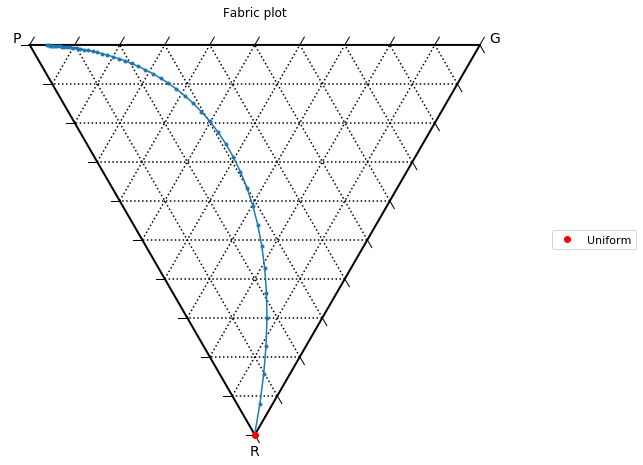

In [75]:
ot = g3.ortensor
otevol = [g3.transform(L.defgrad(t/50)).ortensor for t in range(50)]
f = VollmerPlot()
f.path(otevol)
f.plot(ot, 'ro')
f.show()

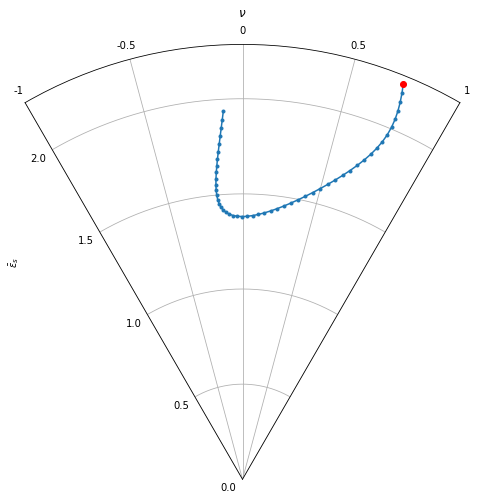

In [76]:
L = VelGrad.from_comp(xx=-2, zz=2)
Eevol = [E.transform(L.defgrad(t/50)) for t in range(50)]
r = HsuPlot()
r.path(Eevol)
r.plot(E, 'ro')
r.show()

## Cluster class
``Cluster`` class provide access to **scipy** hierarchical clustering. Distance matrix is calculated as mutual angles of features within Group keeping axial and/or vectorial nature in mind. ``Cluster.explain`` method allows to explore explained variance versus number of clusters relation. Actual cluster is done by ``Cluster.cluster`` method, using distance or maxclust criterion. Using of ``Cluster`` is explained in following example. We generate some data and plot dendrogram

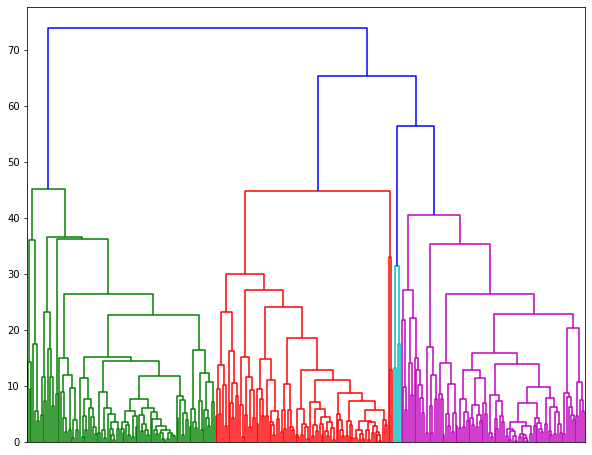

In [77]:
g1 = Group.randn_lin(mean=Lin(45,30))
g2 = Group.randn_lin(mean=Lin(320,56))
g3 = Group.randn_lin(mean=Lin(150,40))
g = g1 + g2 + g3
cl = Cluster(g)
cl.dendrogram(no_labels=True)

Now we can explore evolution of within-groups variance versus number of clusters on Elbow plot (Note change in slope for three clusters)

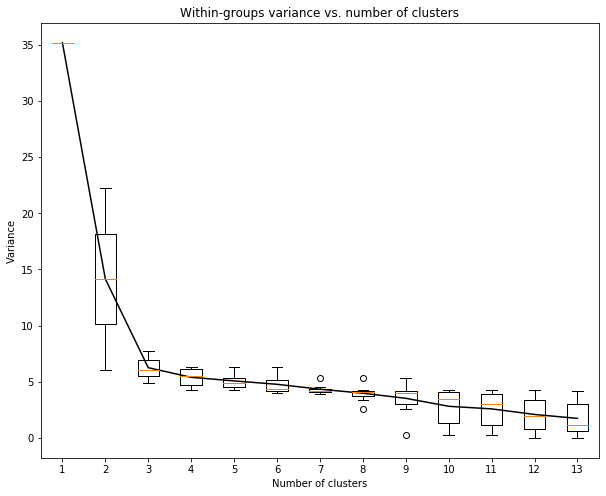

In [78]:
cl.elbow()

Finally we can do clustering and plot created clusters

In [79]:
cl.cluster(maxclust=3)
cl.R.data  # Restored centres of clusters

[L:148/42, L:317/55, L:45/26]

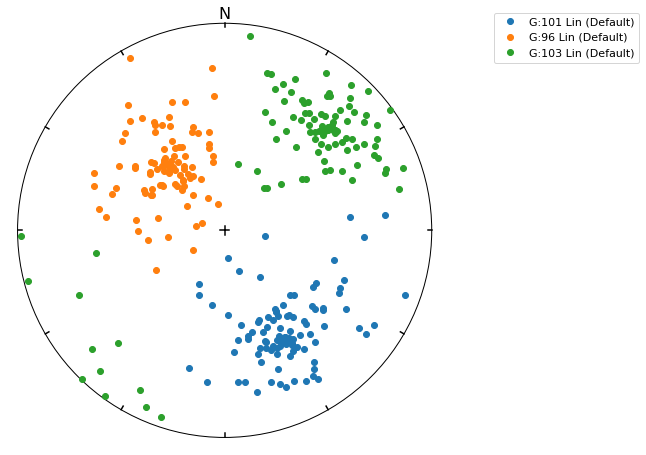

In [80]:
StereoNet(*cl.groups);

## Some tricks

Double cross products are allowed but not easy to understand.

For example ``p**l**p`` is interpreted as ``p**(l**p)``: a) ``l**p`` is plane defined by ``l`` and ``p`` normal b) intersection of this plane and ``p`` is calculated

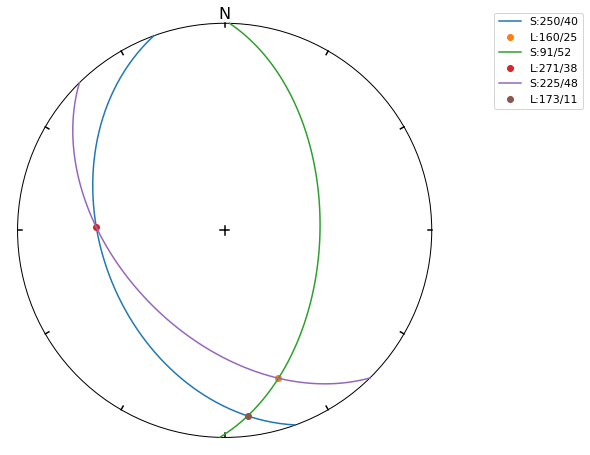

In [81]:
p = Fol(250,40)
l = Lin(160,25)
StereoNet(p, l, l**p, p**l, l**p**l, p**l**p);

``Pair`` class could be used to correct measurements of planar linear features which should spatialy overlap

In [82]:
pl = Pair(250, 40, 160, 25)
pl.misfit

18.889520432245405

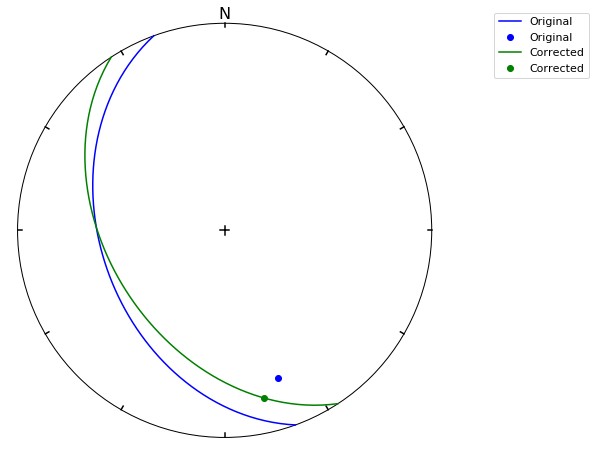

In [83]:
s = StereoNet()
s.plane(Fol(250, 40), 'b', label='Original')
s.line(Lin(160, 25), 'bo', label='Original')
s.plane(pl.fol, 'g', label='Corrected')
s.line(pl.lin, 'go', label='Corrected')
s.show()

``StereoNet`` has method ``arrow`` to draw arrow. Here is example of Hoeppner plot for variable fault orientation within given stress field

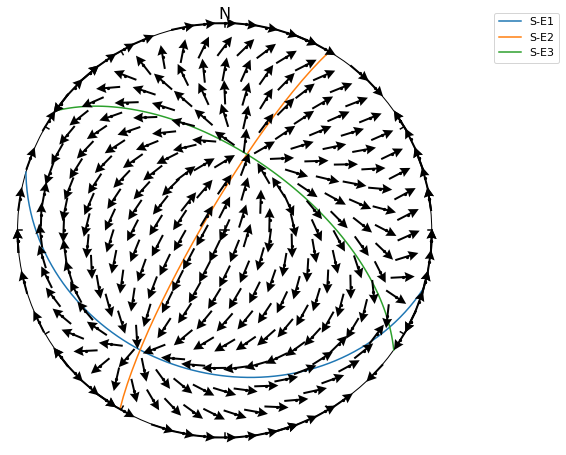

In [84]:
S = Stress([[-8, 0, 0],[0, -5, 0],[0, 0, -1]]).rotate(Lin(90,45), 45)
d = StereoGrid(npoints=300)
s = StereoNet()
s.tensor(S)
for dc in d.dcgrid:
    f = S.fault(dc)
    s.arrow(f.fvec, f.lvec, f.sense)
s.show()